# Exploratory Data Analysis (EDA)

## Flows:

### 1. DATA PROFILES

### 2. DATA RELATIONSHIPS

###

###

###

###

In [1]:
# First, import the relevant modules and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#suppress future warnings
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

In [2]:
# Import Austin_TX_House_Listings_data_v1.csv & us_income_zipcode.csv
df = pd.read_csv('../03_processed_data/austin_housePrice_and_income_data.csv', low_memory=False)

In [3]:
df.shape

(162063, 54)

In [4]:
df.head()

,zipcode,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,...,zpid,latest_price,latest_salemonth,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
0,78732,78732.0,5.0,4.0,30.354322,4060.0,-97.911278,1.98,2007.0,5.0,...,70352485.0,715000.0,2.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,194007.3
1,78732,78732.0,5.0,4.0,30.354322,4060.0,-97.911278,1.98,2007.0,5.0,...,70352485.0,715000.0,2.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,195901.3
2,78732,78732.0,5.0,4.0,30.354322,4060.0,-97.911278,1.98,2007.0,5.0,...,70352485.0,715000.0,2.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,186103.0
3,78732,78732.0,5.0,4.0,30.354322,4060.0,-97.911278,1.98,2007.0,5.0,...,70352485.0,715000.0,2.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,172963.7
4,78732,78732.0,5.0,4.0,30.354322,4060.0,-97.911278,1.98,2007.0,5.0,...,70352485.0,715000.0,2.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,162950.7


In [5]:
df.tail()

,zipcode,address_zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,...,zpid,latest_price,latest_salemonth,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
162058,78749,78749.0,2.5,3.0,30.218878,1700.0,-97.86496,1.98,1986.0,NaN,...,29486556.0,384900.0,1.0,2018.0,0.0,1.0,1.0,8450.0,226.411765,97670.7
162059,78749,78749.0,2.5,3.0,30.218878,1700.0,-97.86496,1.98,1986.0,NaN,...,29486556.0,384900.0,1.0,2018.0,0.0,1.0,1.0,8450.0,226.411765,93443.0
162060,78749,78749.0,2.5,3.0,30.218878,1700.0,-97.86496,1.98,1986.0,NaN,...,29486556.0,384900.0,1.0,2018.0,0.0,1.0,1.0,8450.0,226.411765,92512.3
162061,78749,78749.0,2.5,3.0,30.218878,1700.0,-97.86496,1.98,1986.0,NaN,...,29486556.0,384900.0,1.0,2018.0,0.0,1.0,1.0,8450.0,226.411765,89517.7
162062,78749,78749.0,2.5,3.0,30.218878,1700.0,-97.86496,1.98,1986.0,NaN,...,29486556.0,384900.0,1.0,2018.0,0.0,1.0,1.0,8450.0,226.411765,89710.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162063 entries, 0 to 162062
Data columns (total 54 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   zipcode                                    162063 non-null  int64  
 1   address_zipcode                            162063 non-null  float64
 2   bathrooms                                  160765 non-null  float64
 3   bedrooms                                   161568 non-null  float64
 4   latitude                                   162063 non-null  float64
 5   livingArea                                 162063 non-null  float64
 6   longitude                                  162063 non-null  float64
 7   propertyTaxRate                            162063 non-null  float64
 8   resoFactsStats_atAGlanceFacts_1_factValue  162063 non-null  float64
 9   resoFactsStats_bathrooms                   160325 non-null  float64
 10  resoFact

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zipcode,162063.0,7.873585e+04,1.909204e+01,7.861700e+04,7.872700e+04,7.873900e+04,7.874900e+04,7.875900e+04
address_zipcode,162063.0,7.873585e+04,1.909204e+01,7.861700e+04,7.872700e+04,7.873900e+04,7.874900e+04,7.875900e+04
bathrooms,160765.0,2.662282e+00,1.004923e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.700000e+01
bedrooms,161568.0,3.427424e+00,8.234998e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+01
latitude,162063.0,3.029480e+01,9.718675e-02,3.008503e+01,3.020707e+01,3.029100e+01,3.036956e+01,3.051732e+01
livingArea,162063.0,2.153247e+03,1.098102e+03,1.000000e+00,1.460000e+03,1.926000e+03,2.595000e+03,4.500000e+04
longitude,162063.0,-9.777242e+01,7.951063e-02,-9.802206e+01,-9.783155e+01,-9.776600e+01,-9.771461e+01,-9.757063e+01
propertyTaxRate,162063.0,1.994037e+00,5.442700e-02,1.980000e+00,1.980000e+00,1.980000e+00,1.980000e+00,2.210000e+00
resoFactsStats_atAGlanceFacts_1_factValue,162063.0,1.987529e+03,2.763329e+01,0.000000e+00,1.973000e+03,1.992000e+03,2.005000e+03,2.020000e+03
resoFactsStats_bathrooms,160325.0,2.640274e+00,1.031745e+00,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.700000e+01


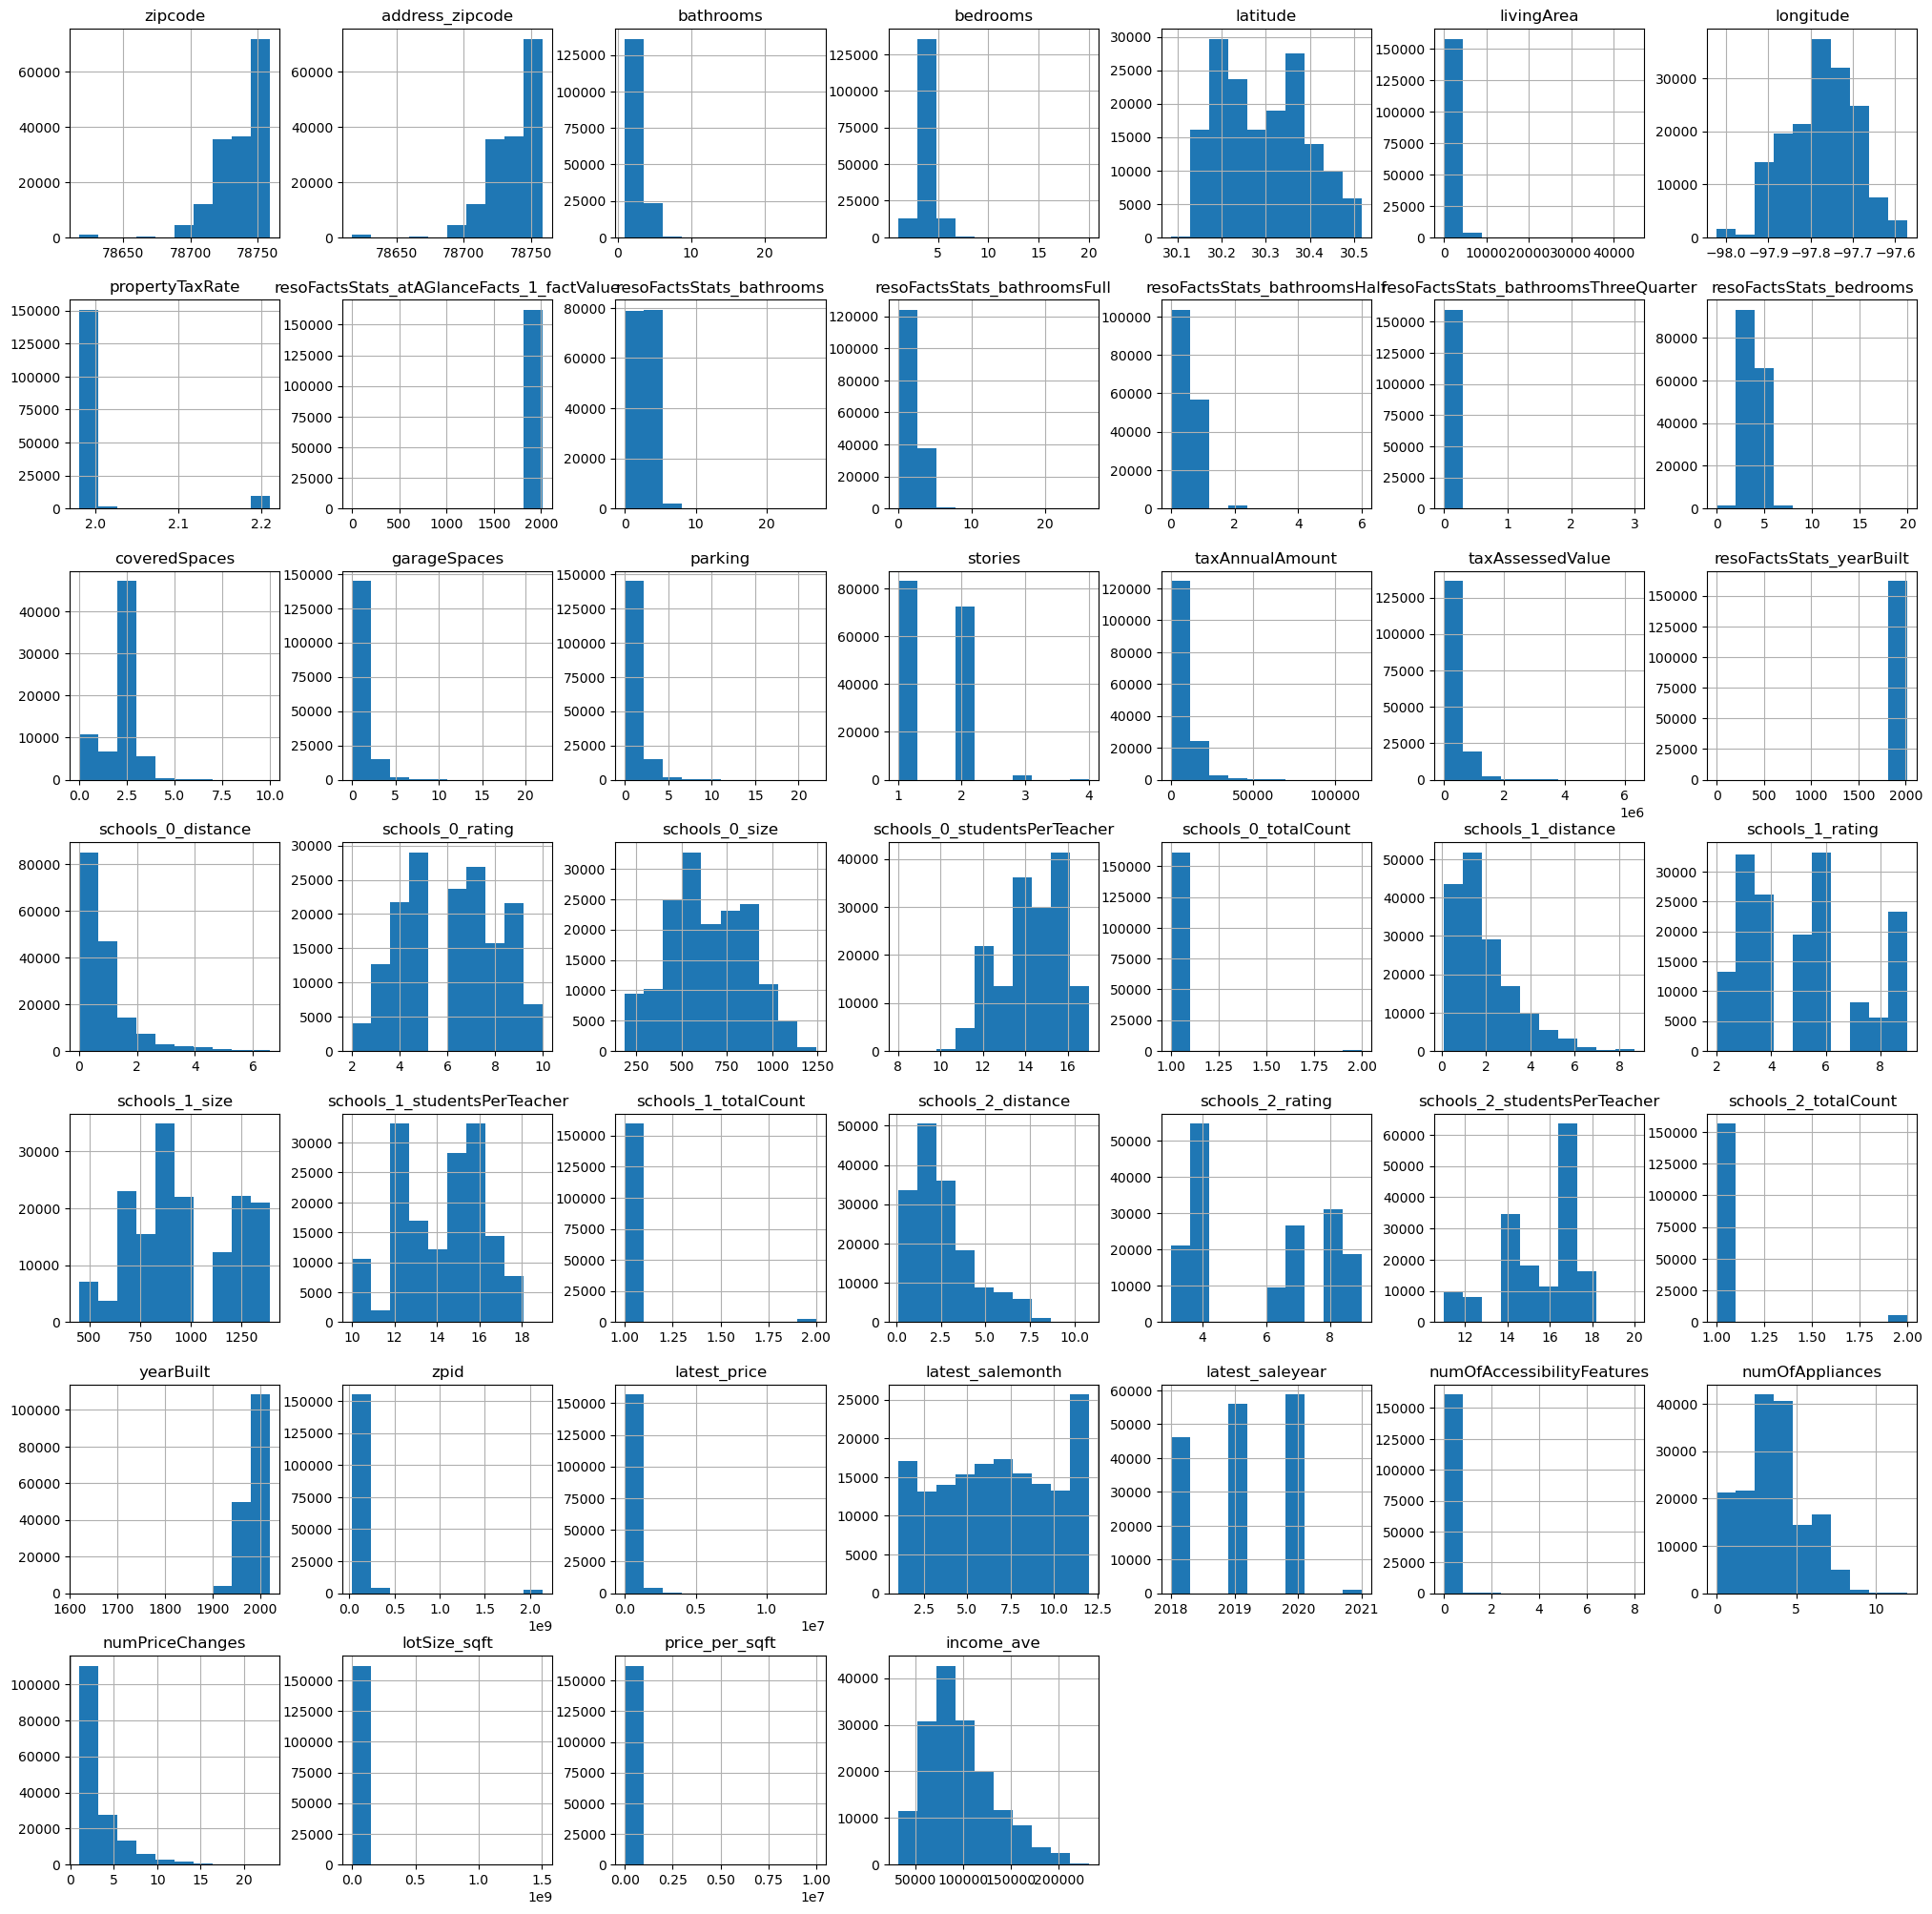

In [8]:
hist = df.hist(bins=10,figsize =(25,25))

In [15]:
df.select_dtypes(include = 'object').count()

Series([], dtype: int64)

In [9]:
#select categorical variables only
#df_cat = df.select_dtypes(include = 'object').copy()
#get counts of each variable value
#df_cat.ColumnName.value_counts()
#count plot for one variable
#sns.countplot(data = df_cat, x = 'ColumnName')

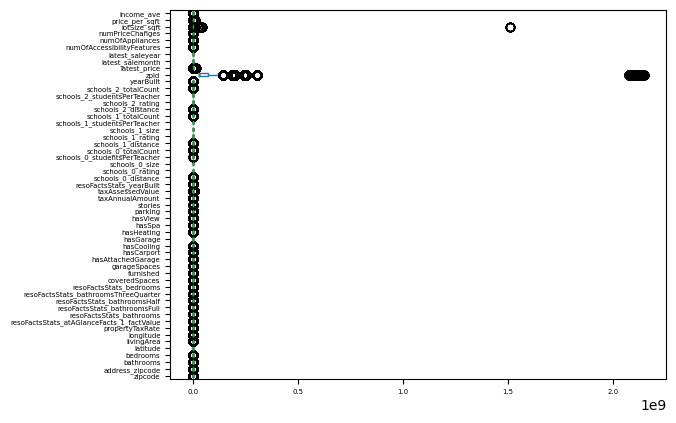

In [17]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=5)

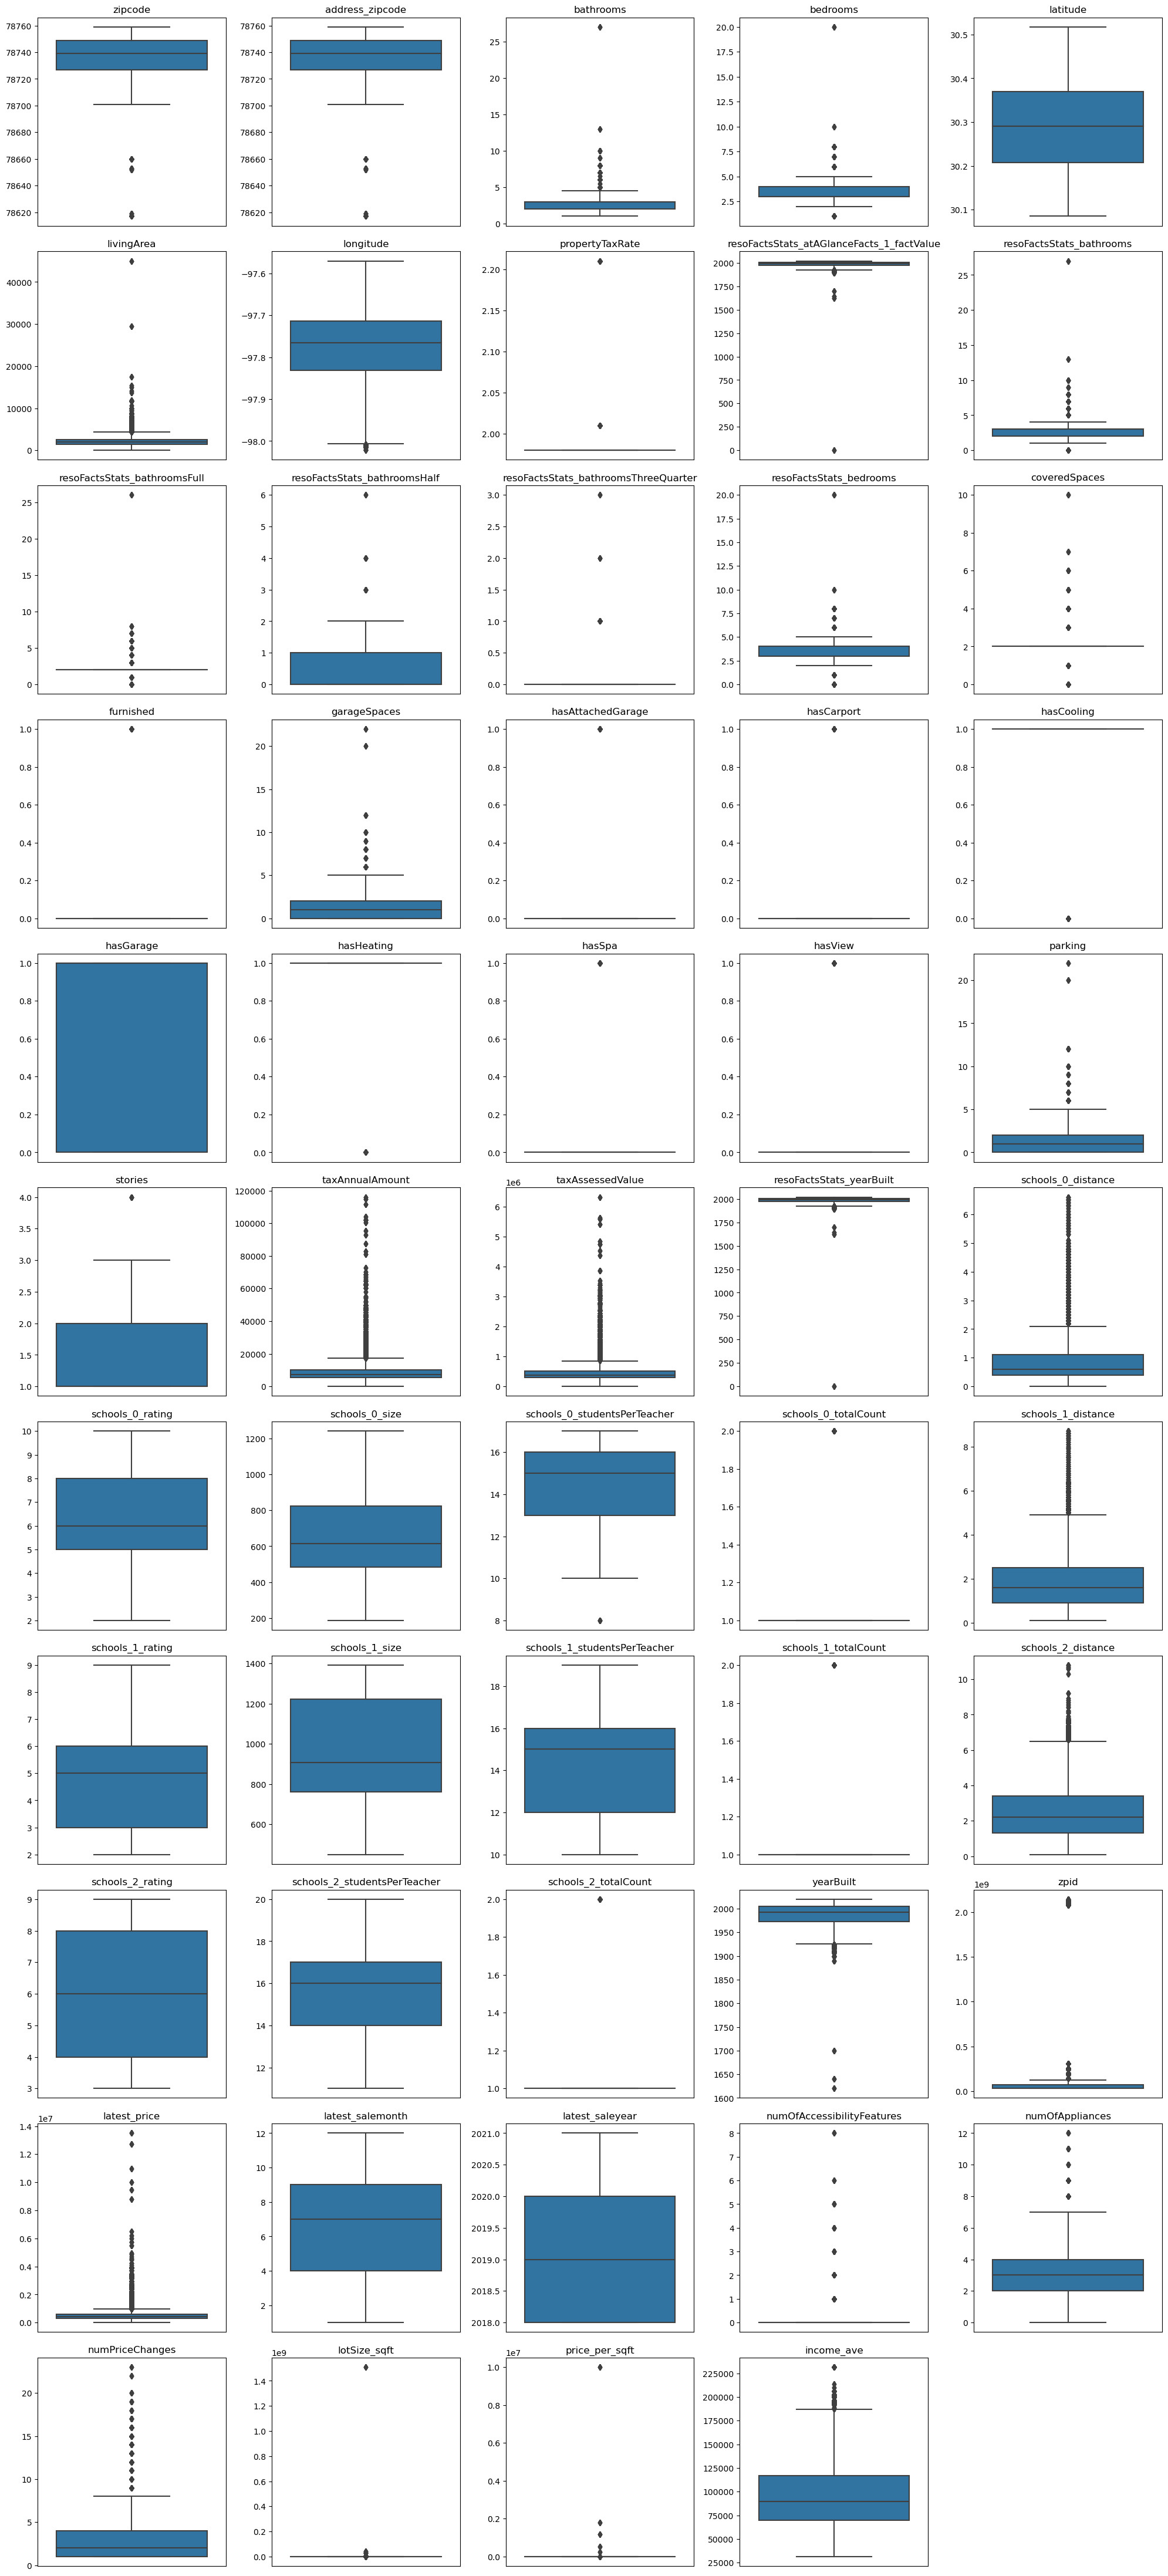

In [18]:
n_cols = 5  # Number of columns of subplots
n_rows = (df.shape[1] + n_cols - 1) // n_cols  # Calculate required rows

plt.figure(figsize=(20, 4 * n_rows))  # Adjust figure size based on number of rows

# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create subplot for each column
    sns.boxplot(data=df[column])  # Create box plot for the current column
    plt.title(column)  # Set title for the subplot
    plt.xticks([])  # Optionally hide x-ticks

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plots

### 2. DATA RELATIONSHIPS

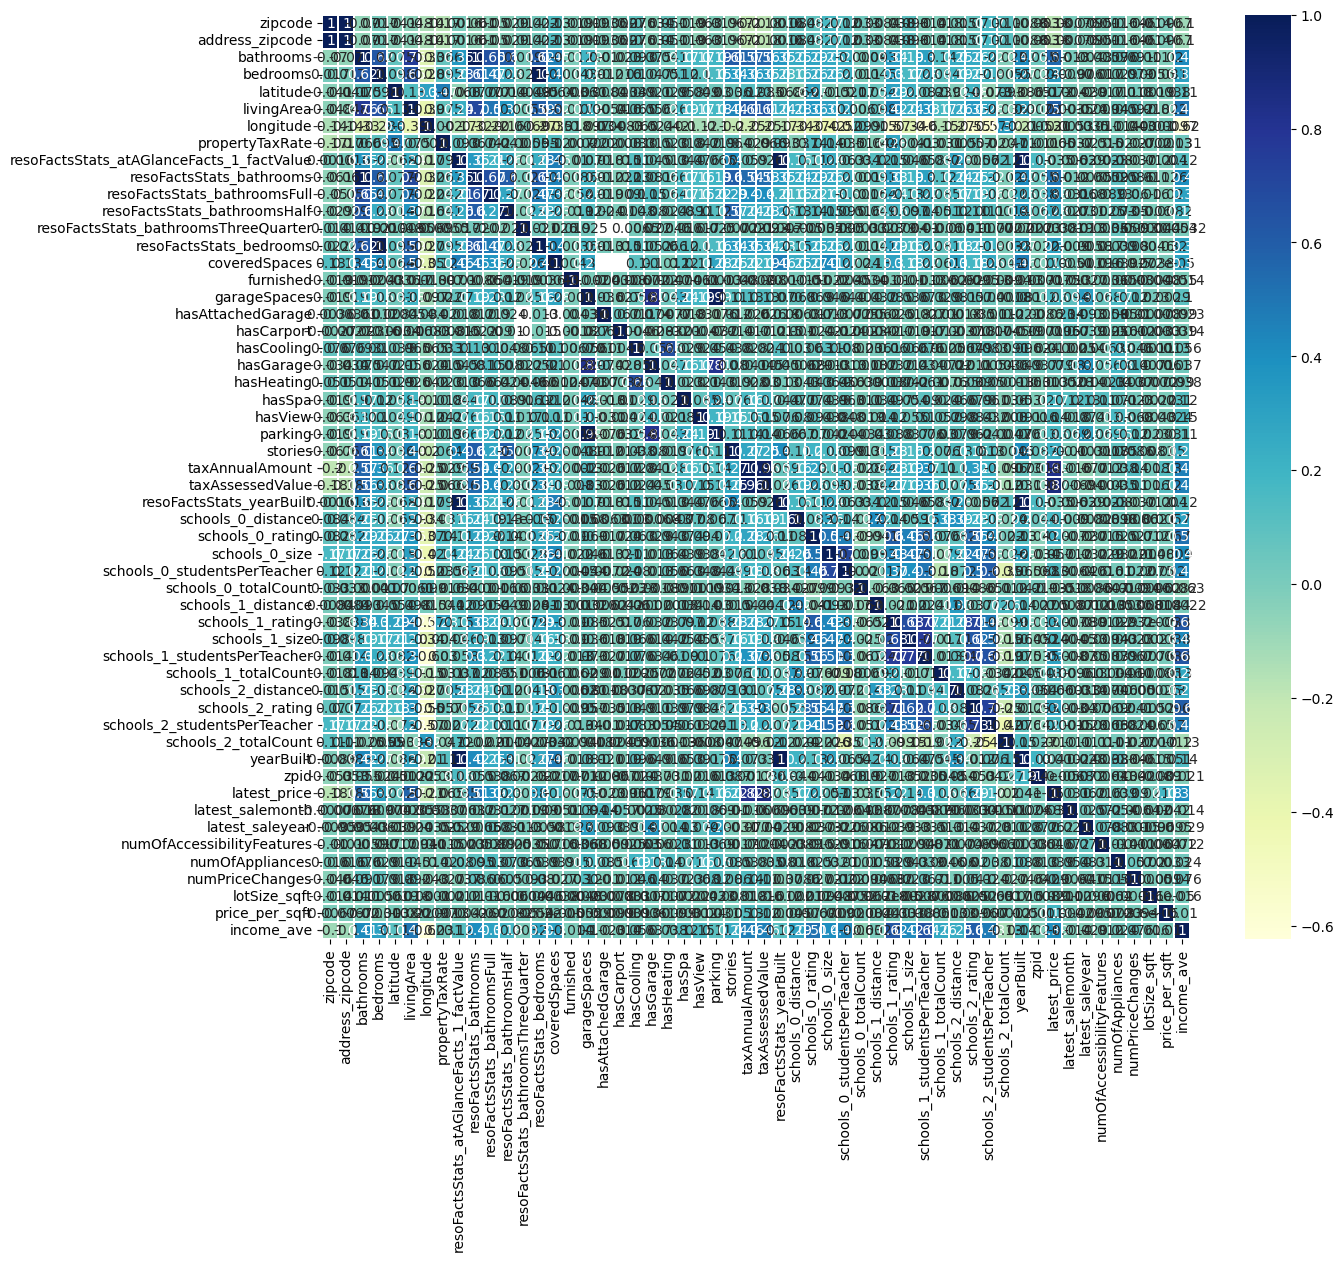

In [20]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
#pair plots

g = sns.pairplot(df)


### 3. IDENTIFYING AND CREATING FEATURES

In [11]:
# Count plot
#sns.countplot(data=df, x='category')
#plt.title('Count of Categories')
#plt.show()

In [ ]:
# Save the DataFrame to a CSV file
#df_new.to_csv('../03_processed_data/austin_housePrice_and_income_data_v2.csv', index=False)

#print("DataFrame saved to 'austin_housePrice_and_income_data_v2.csv'.")

#datapath = '../03_processed_data'
#save_file(merged_df, 'austin_housePrice_and_income_data.csv', datapath)